# Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')  
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# get all columns of type object (strings)
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [9]:
# print unique values for each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of Price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

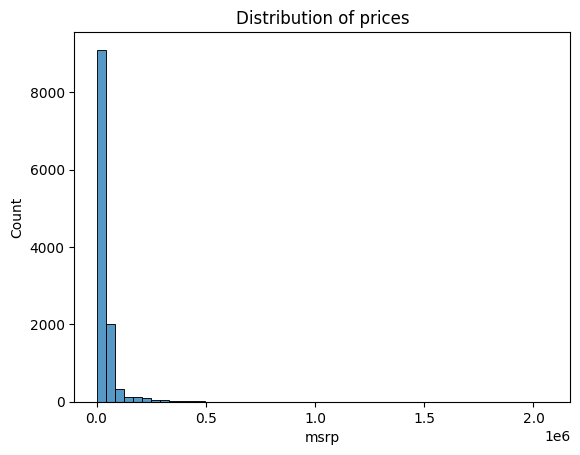

In [11]:
# Shows a long tail distribution
sns.histplot(df.msrp, bins=50)
plt.title('Distribution of prices')
plt.show()  

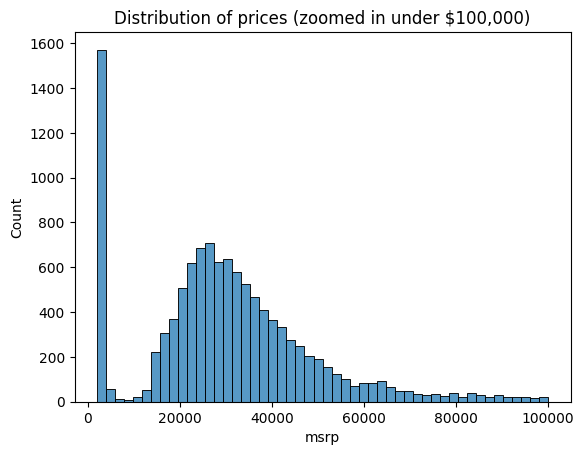

In [12]:
# Zoom in on smaller values
sns.histplot(df.msrp[df.msrp<100000], bins=50)
plt.title('Distribution of prices (zoomed in under $100,000)')
plt.show()

In [13]:
df.msrp.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

In [14]:
# Long tail distribution is not good for regression 
# - we can use log transformation to the price 

In [15]:
np.log([1,10,100,1000,1000]) # log transformation reduces the impact of outliers

array([0.        , 2.30258509, 4.60517019, 6.90775528, 6.90775528])

In [16]:
# be mindful that log(0) is undefined - add 1 to avoid that - use log1p
np.log1p([1,10,100,1000,1000])


array([0.69314718, 2.39789527, 4.61512052, 6.90875478, 6.90875478])

In [17]:
prices = df.msrp.values
log_prices = np.log1p(prices)

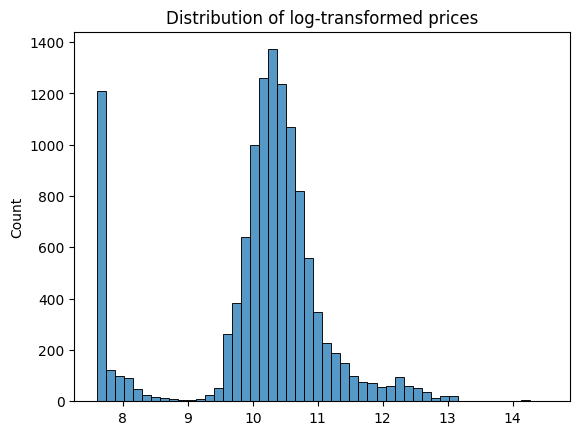

In [18]:
# Looks more like a normal distribution - ideal for regression

sns.histplot(log_prices, bins=50)
plt.title('Distribution of log-transformed prices')
plt.show()

### Missing Values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [20]:
# calculate sizes of train, val, test sets
# 60% train, 20% val, 20% test
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [22]:
# Problem: the dataset is ordered - we need to shuffle it
# create a sequence of indices 
idx = np.arange(n)
np.random.seed(2)  # for reproducibility
# shuffle the indices
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [23]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [24]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [25]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [26]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [27]:
# reset the index columns
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
# apply log transformation to the target variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [29]:
# delete the target variable from the dataframes to prevent data leakage
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [30]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

## Linear Regression

### Manual

In [31]:
# Feature Matrix:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [32]:
# engine_hp, city_mpg and popularity as sample feature matrix:
xi = [453, 11, 86]

In [33]:
# weights
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [34]:
# define prediction function
def linear_regression(xi):
    n = len(xi) # number of features

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [35]:
pred = linear_regression(xi)
# to undo the log transformation, use expm1
np.expm1(pred)  # predicted price

np.float64(222347.2221101062)

### Vector Form

In [36]:
# dot product
def dot_product(xi, w):
    n = len(xi)

    result = 0.0

    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [37]:
# add bias term to list of weights
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [38]:
# define prediction function
def linear_regression(xi):
    xi = [1] + xi  # add bias term to feature vector - w0 will always be multiplied by 1
    return dot_product(xi, w)

In [39]:
# feature matrix:
x1 = [ 1, 453, 11, 86 ]
x2 = [  1, 200, 15, 100 ]
x3 = [  1, 300, 20, 80 ]

X = [x1, x2, x3]
X = np.array(X)
X

array([[  1, 453,  11,  86],
       [  1, 200,  15, 100],
       [  1, 300,  20,  80]])

In [40]:
# returns a list of predictions - matrix vector multiplication between features and weights
def linear_regression(X):
    return X.dot(w_new)

In [41]:
linear_regression(X)

array([12.312,  9.97 , 11.13 ])

# Training Linear Regression - Normal Equation
## Ordinary Least Squares Method

In [42]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X ])  # add bias-term to feature-matrix
    # create gram-matrix X^TX
    XTX = X.T.dot(X)
    # create inverse of gram-matrix (X^TX)^-1
    inv_XTX = np.linalg.inv(XTX)

    w_full = inv_XTX.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [43]:
X = np.array([
    [   453,  11,  1385],
    [  200,  15, 100],
    [   300,  20,  201],
    [   38,  11,  86],
    [  142,  15, 185],
    [   300,  31,  80]
       ])

y = [100000, 50000, 70000, 20000, 40000, 60000]

In [44]:
train_linear_regression(X,y)

(np.float64(21488.972470183),
 array([ 214.8182728 , -799.70288682,   -7.06873952]))

# Car price baseline model

In [45]:
# get all numerical columns
features = df_train.dtypes[df_train.dtypes != 'object'].index.values
features

array(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity'], dtype=object)

In [46]:
# baseline features
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

In [47]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [48]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [49]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [50]:
X_train = prepare_X(df_train)
X_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   0.]], shape=(7150, 41))

In [51]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [52]:
w0,w = train_linear_regression(prepare_X(df_train), y_train)

In [53]:
y_train_pred = w0 + X_train.dot(w)

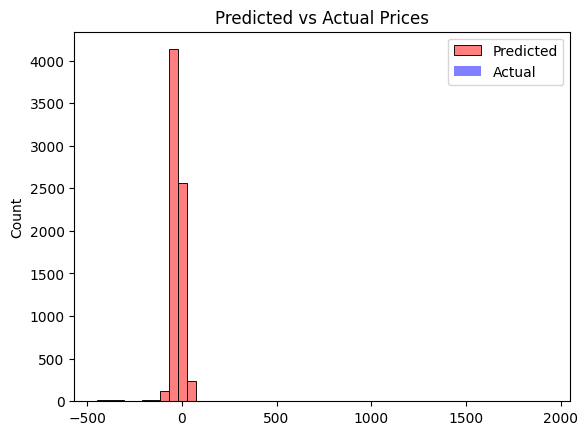

In [54]:
sns.histplot(y_train_pred, alpha=0.5, bins=50, color='red')
sns.histplot(y_train, bins=50,alpha=0.5, color='blue')
plt.title('Predicted vs Actual Prices')
plt.legend(['Predicted', 'Actual'])
plt.show()

# Root Mean Squared Error RSME

In [55]:
def rmse(y, y_pred):
    diff = y - y_pred # get difference between predicted and actual values
    return np.sqrt(np.mean(diff**2)) # square them, get the average, get the root of the average

In [56]:
rmse(y_train,y_train_pred)

np.float64(72.38188738153725)

# RSME on Validation Set

In [57]:
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val, y_pred_val)

np.float64(53.70370772576197)

# Simple Feature Engineering 

In [58]:
# added "age" feature in the prepare_X function
# one hot encoded categorical variable number_of_doors and 
# top 5 items for every categorical variable

# Regularization
